# Лабораторная работа №1. Использование нейронных сетей прямого распространения для решения задач классификации.



## Цель работы

Изучение основ работы с нейронными сетями прямого распространения
(FNN) для классификации данных, обучение модели на подготовленном датасете,
анализ и оценка полученных результатов.



##Вариант 2

Вариант 2: "Классификация рукописных цифр (MNIST)"
Описание задачи:
Используем классический датасет MNIST, содержащий изображения рукописных
цифр от 0 до 9. Нужно обучить нейронную сеть для классификации цифр.
Шаги работы:
1. Загрузка данных:
- Датасет MNIST доступен через Keras и на Kaggle.
- Скачать и загрузить датасет.
2. Предобработка данных:
- Нормализовать изображения.
- Разделить данные на обучающую и тестовую выборки.
- Преобразовать метки классов в формат one-hot encoding.
3. Обучение модели:
- Создать нейронную сеть для классификации рукописных цифр.
4. Тестирование:
- Протестировать модель на тестовых данных.
- Оценить точность модели на тестовой выборке.

##Ход выполнения работы

MNIST -  датасет состоящий из 60 000 изображений рукописных цифр от 0 до 9, а также 10 000 тестовых изображений. Изображения имеют размер 28x28 пикселей и черно-белые.

Для начала нужно загрузить датасет. В Keras есть встроенная функция для загрузки MNIST.

Импортируются библиотеки tensorflow (для работы с нейронными сетями), numpy (для работы с массивами данных), matplotlib.pyplot (для визуализации изображений), а также другие необходимые для обучения модели модули.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

Импортируется модуль mnist, который предоставляет доступ к датасету, далее
вызывается метод load_data(), который загружает датасет MNIST и разделяет его на обучающую и тестовую выборки:

Массивы
- x_train: изображения для обучения - 60 000 изображений размером 28x28 пикселей.
- y_train: массив с метками для обучающих данных, каждое значение - это цифра .
- x_test:  тестовые изображения - 10 000.
- y_test: массив с метками для тестовых данных.

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Для удобства изображения, которые используются в модели визуализируются

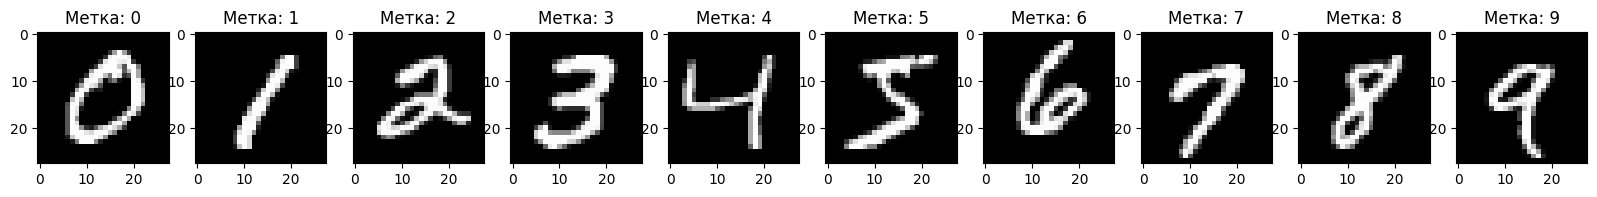

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='grey')
  ax[i].set_title(f"Метка: {i}")

После просмотра меток подтверждается необходимость преобразования в формат one-hot encoding, т.к. нужна классификация.Если оставить эти числа, то нейросеть может выдавать такие результаты как 4.5, что не является нужным результатом.

one-hot encoding - это метод, который заменяет число на вектор, где единица стоит
на месте класса, а остальные значения - нули. Например, если y_train = 6, то после
преобразования будет выглядеть так [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


После преобразования в формате классификации наши метки выглядят как массив размера num_classes, где все значения равны нулю, кроме истинной метик

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


В mnsit изображения представлены в формате RGB, то есть
каждое изображение - это трехмерный массив размером (32, 32, 3). Каждый цвет (R, G, B) кодируется 8 битами, то есть имеет значения от 0 до 255, однако нейросети обучаются быстрее и лучше, если входные данные нормализованы. Деление на 255 переводит пиксели в диапазон [0,1], что помогает нейросети быстрее сходиться

In [ ]:
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/ 255.0

Меняется форма выборок, вместо матрицы 28 на 28 формируется вектор в одном измерении. Данный пункт был проделан т.к. полносвязные (FNN) нейросети требуют входных данных в виде одномерных векторов.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


Далее создается сама модель:
- Sequential() - модель, которая представляет собой последовательность слоев. Каждый слой будет просто принимать данные от предыдущего слоя и передавать их следующему.
- Dense() - полносвязный слой, где каждый нейрон связан с каждым нейроном предыдущего слоя.
- Dropout() - слой регуляризации, который случайным образом "выключает" 25% нейронов в этом слое во время обучения

- 'relu' преобразует все отрицательные значения в ноль и пропускает положительные значения без изменений ускоряет обучение.

- 'softmax' она преобразует выходные данные слоя в распределение вероятностей по 10 классам.
- оптимизатор Adam регулирует скорость обучения для каждого веса, ускоряя обучение.

- Функция потерь была выбрана categorical_crossentropy. Если модель предсказала неверный класс, штраф (loss) будет высоким.

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

118 282 - Общее количество параметров которое будет обучаться, как оно получилос:
Модель принимает 784 параметра (размер изображения 28 на 28, который мы перевели в вектор) далее у нас есть 128 нейроново.
Кол-во параметров для слоя = (входные признаки * кол-во нейронов) + кол-во смещений = (784 * 128) + 128 = 100 480
Второй слой (128 * 128) + 128 = 16 512
Третий слой 0
Четвертый слой (128 * 10) + 10 = 1290
В сумме получается 118 282

 - Один эпох - это когда модель увидела все данные из обучающего набора хотя бы один раз.
 - batch_size = 512 - означает, что в каждом шаге будет использоваться 512 изображений для вычисления градиента и обновления весов.

In [ ]:
batch_size = 512
epochs=10
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6886 - loss: 1.0442 - val_accuracy: 0.9304 - val_loss: 0.2414
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9290 - loss: 0.2426 - val_accuracy: 0.9500 - val_loss: 0.1685
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9523 - loss: 0.1694 - val_accuracy: 0.9607 - val_loss: 0.1313
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9603 - loss: 0.1361 - val_accuracy: 0.9665 - val_loss: 0.1096
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9674 - loss: 0.1113 - val_accuracy: 0.9686 - val_loss: 0.0991
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9731 - loss: 0.0916 - val_accuracy: 0.9718 - val_loss: 0.0877
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9750 - loss: 0.0842 - val_accuracy: 0.9731 - val_loss: 0.0834
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9804 - loss: 0.0669 - val_accu

- Модель значительно улучшила свою точность с 68% до более чем 98% за 10 эпох.
- Потери снижаются, что показывает, что модель с каждым шагом улучшает свои прогнозы.
- В начале обучение идет быстрее, но по мере тренировки улучшения становятся менее выраженными.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Потеря: {}, Точность: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0860
Потеря: 0.07273954898118973, Точность: 0.9775000214576721


Далее для наглядности выведем массив из вероятностей принадлежности к каждой метке

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.07983123e-07 8.98820815e-07 5.47293021e-05 ... 9.99797821e-01
  3.84857458e-06 1.25882789e-05]
 [3.49755034e-08 1.01124184e-04 9.99865770e-01 ... 1.03454894e-07
  1.88094441e-06 1.37743783e-09]
 [2.90883963e-06 9.94416296e-01 3.53682495e-04 ... 4.67993179e-03
  1.96271241e-04 5.16792261e-06]
 ...
 [2.05911094e-10 3.49760021e-09 2.19289609e-09 ... 5.23707558e-06
  3.91600088e-06 6.24418681e-05]
 [1.99377311e-07 5.28596651e-08 2.43024498e-08 ... 9.85549832e-07
  2.45663745e-04 6.97504721e-10]
 [8.78465016e-08 2.60133159e-09 1.71755801e-07 ... 2.24815278e-10
  3.80988885e-09 4.65107908e-09]]
[7 2 1 ... 4 5 6]


Далее демонстрируется работа модели на случайном изображении

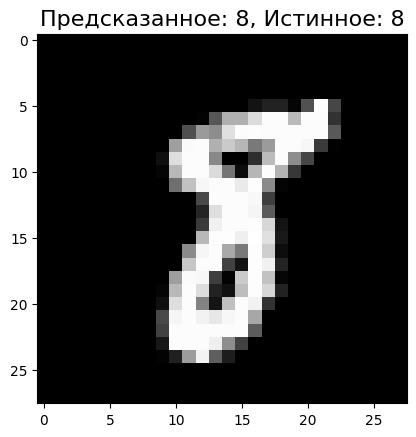

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Предсказанное: {}, Истинное: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

Строится матрица ошибок, по ней можно сказать что больше всего наша модель путает четверки с девятками

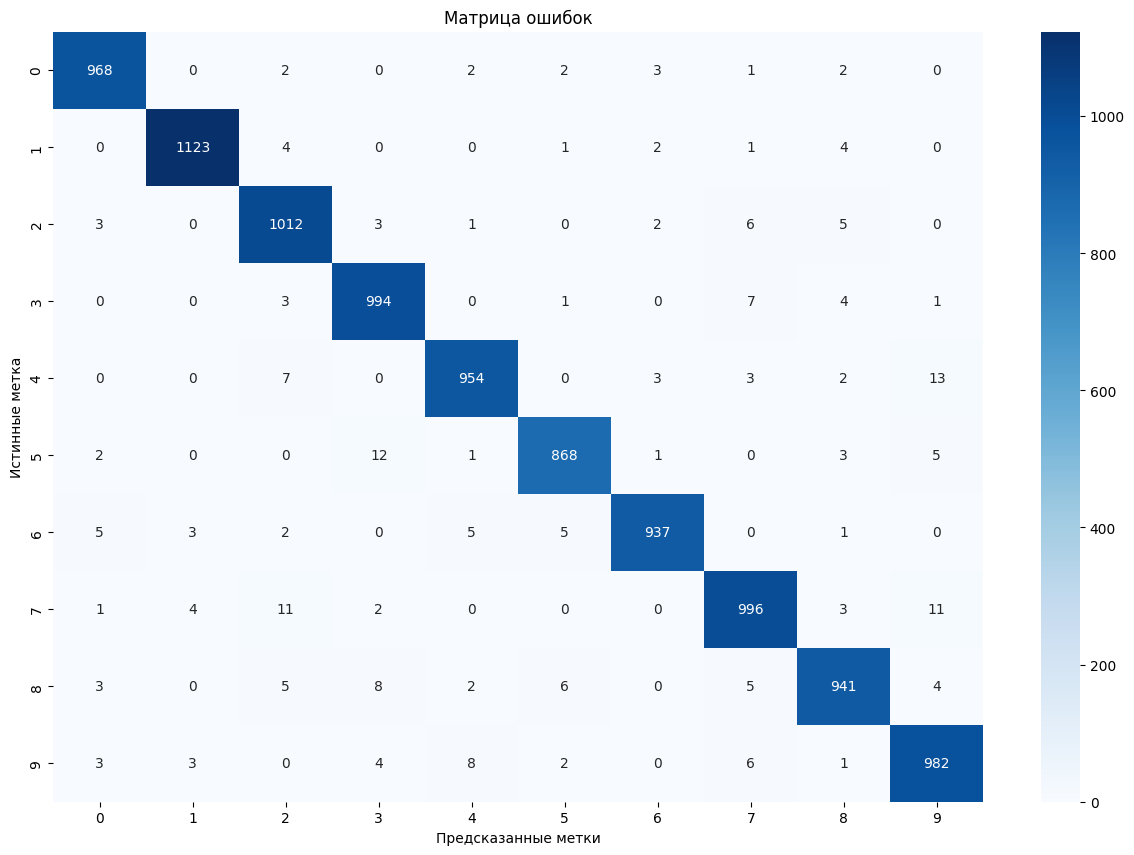

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Предсказанные метки')
ax.set_ylabel('Истинные метка')
ax.set_title('Матрица ошибок');

Выведем изображения, которые модель распознала неправильно:
Для начала отберем маску ошибок, errors = (y_pred_classes - y_true != 0), затем отбираются только те элементы которые ошибочны.

После отбираются вероятности предсказаний, истинная метка, отклонение, и массив сортируются и отбираются 5 значений в которых была допущена наибольшая ошибка


In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

Результаты выводятся на экран

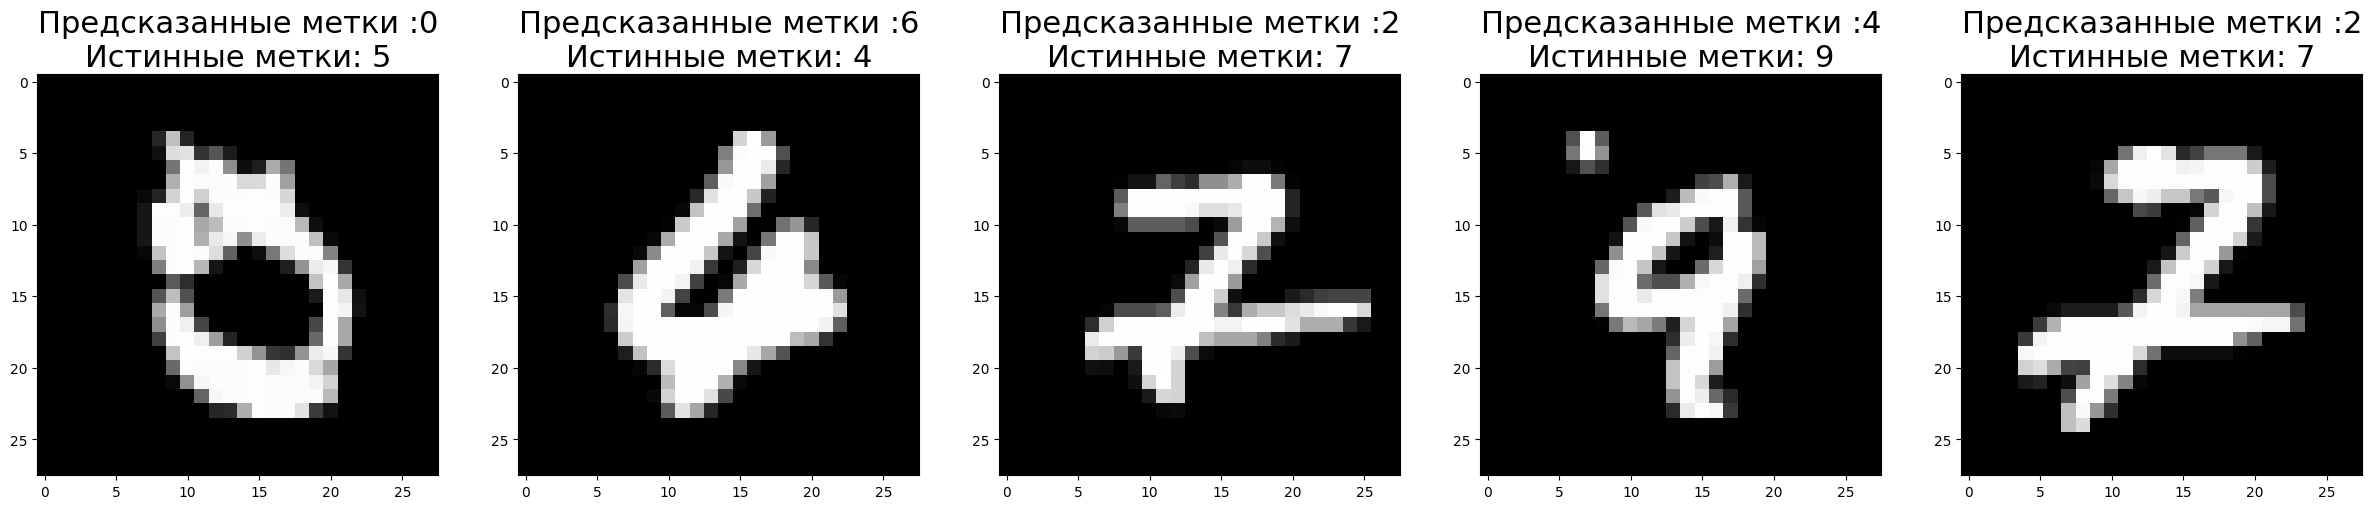

In [ ]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='grey')
  ax[i].set_title("Предсказанные метки :{}\nИстинные метки: {}".format(y_p, y_t), fontsize=22)

Смотря на изображения, становится понятно почему модель неправильно их предсказала, они и правда очень похожи на те значения, которые предсказала модель

Строятся графики, которые отображают изменение точности модели в зависимости
от эпохи, а также изменение потерь.

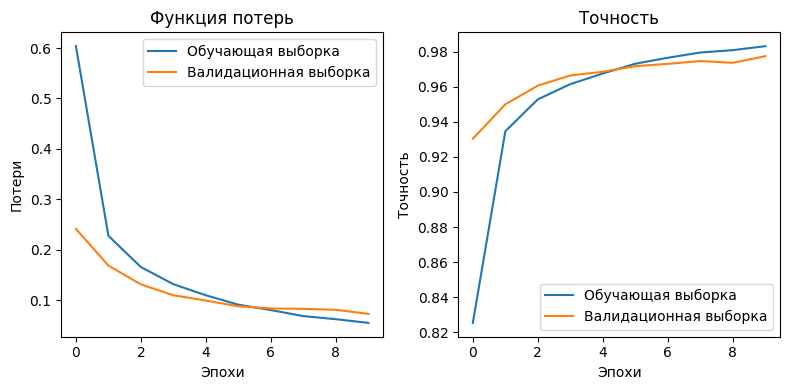

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(history.history['loss'], label='Обучающая выборка')
ax1.plot(history.history['val_loss'], label='Валидационная выборка')
ax1.set_title('Функция потерь')
ax1.set_xlabel('Эпохи')
ax1.set_ylabel('Потери')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Обучающая выборка')
ax2.plot(history.history['val_accuracy'], label='Валидационная выборка')
ax2.set_title('Точность')
ax2.set_xlabel('Эпохи')
ax2.set_ylabel('Точность')
ax2.legend()

plt.tight_layout()
plt.show()


- Потери на обучающей выборке уменьшаются с каждой эпохой, что свидетельствует о том, что модель успешно обучается и минимизирует ошибку. На последних эпохах потери стабилизируются на низком уровне (близком к 0.05), что говорит о хорошей сходимости модели.
- Потери на валидационной выборке также уменьшаются, к концу обучения потери на валидационной выборке стабилизируются на уровне около 0.10.

- Точность на обучающей выборке быстро растет и к концу обучения достигает значения около 0.99 (99%). Это указывает на то, что модель хорошо подстраивается под обучающие данные.
-  Точность на валидационной выборке также растет. К концу обучения точность на валидационной выборке достигает значения около 0.97 (97%).

#Вывод


В ходе выполнения работы была разработана и обучена модель для классификации рукописных цифр из набора данных MNIST. На начальном этапе были загружены и предварительно обработаны данные: изображения нормализованы, преобразованы в одномерные векторы и метки классов — в формат one-hot encoding. Это обеспечило корректную подготовку данных для обучения модели.

Для решения задачи классификации была использована нейронная сеть прямого распространения (FNN) с двумя скрытыми слоями, функцией активации ReLU и выходным слоем с функцией активации softmax. Модель была скомпилирована с использованием оптимизатора Adam и функции потерь categorical_crossentropy, что является стандартным выбором для многоклассовой классификации.

Процесс обучения модели показал отличные результаты. За 10 эпох точность на обучающей выборке повысилась с 68.1% до 98.5%, а на валидационной выборке — с 93.1% до 97.6%. Эти результаты демонстрируют высокую эффективность модели и ее способность обобщать на новые данные.

Дополнительный анализ с использованием матрицы ошибок показал, что модель чаще всего путает цифры 4 и 9, что объясняется их визуальной схожестью.

В итоге, разработанная модель успешно решает задачу классификации рукописных цифр MNIST, достигая высоких результатов как по точности, так и по снижению потерь.